In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Database dimension     : (16598, 11)
Database size          : 182578

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50

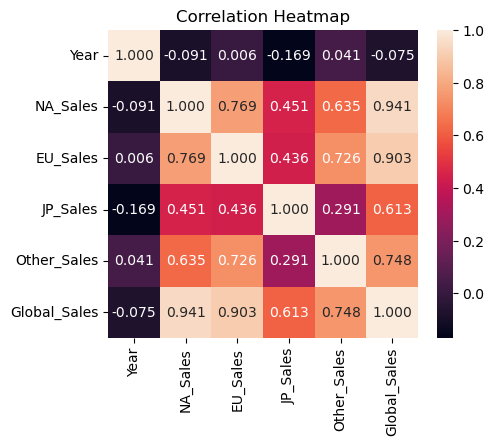

In [249]:
# Load the dataset
data_vg = pd.read_csv("vgsales.csv")




# Explore and preprocess the data
def explore_and_preprocess_data(data):
    # Summary of the dataset
    print("Database dimension     :", data.shape)
    print("Database size          :", data.size)
    print()
    print(data_vg.describe())

    # Remove invalid data in YEAR column and drop RANK column
    data.dropna(inplace=True)
    data.drop(columns="Rank", inplace=True)
    data = data[data["Year"] < 2017.0]
    return data

data_vg = explore_and_preprocess_data(data_vg)

# Select only numeric columns for the correlation heatmap
numeric_data = data_vg.select_dtypes(include=['int', 'float'])

# Create a correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()


c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



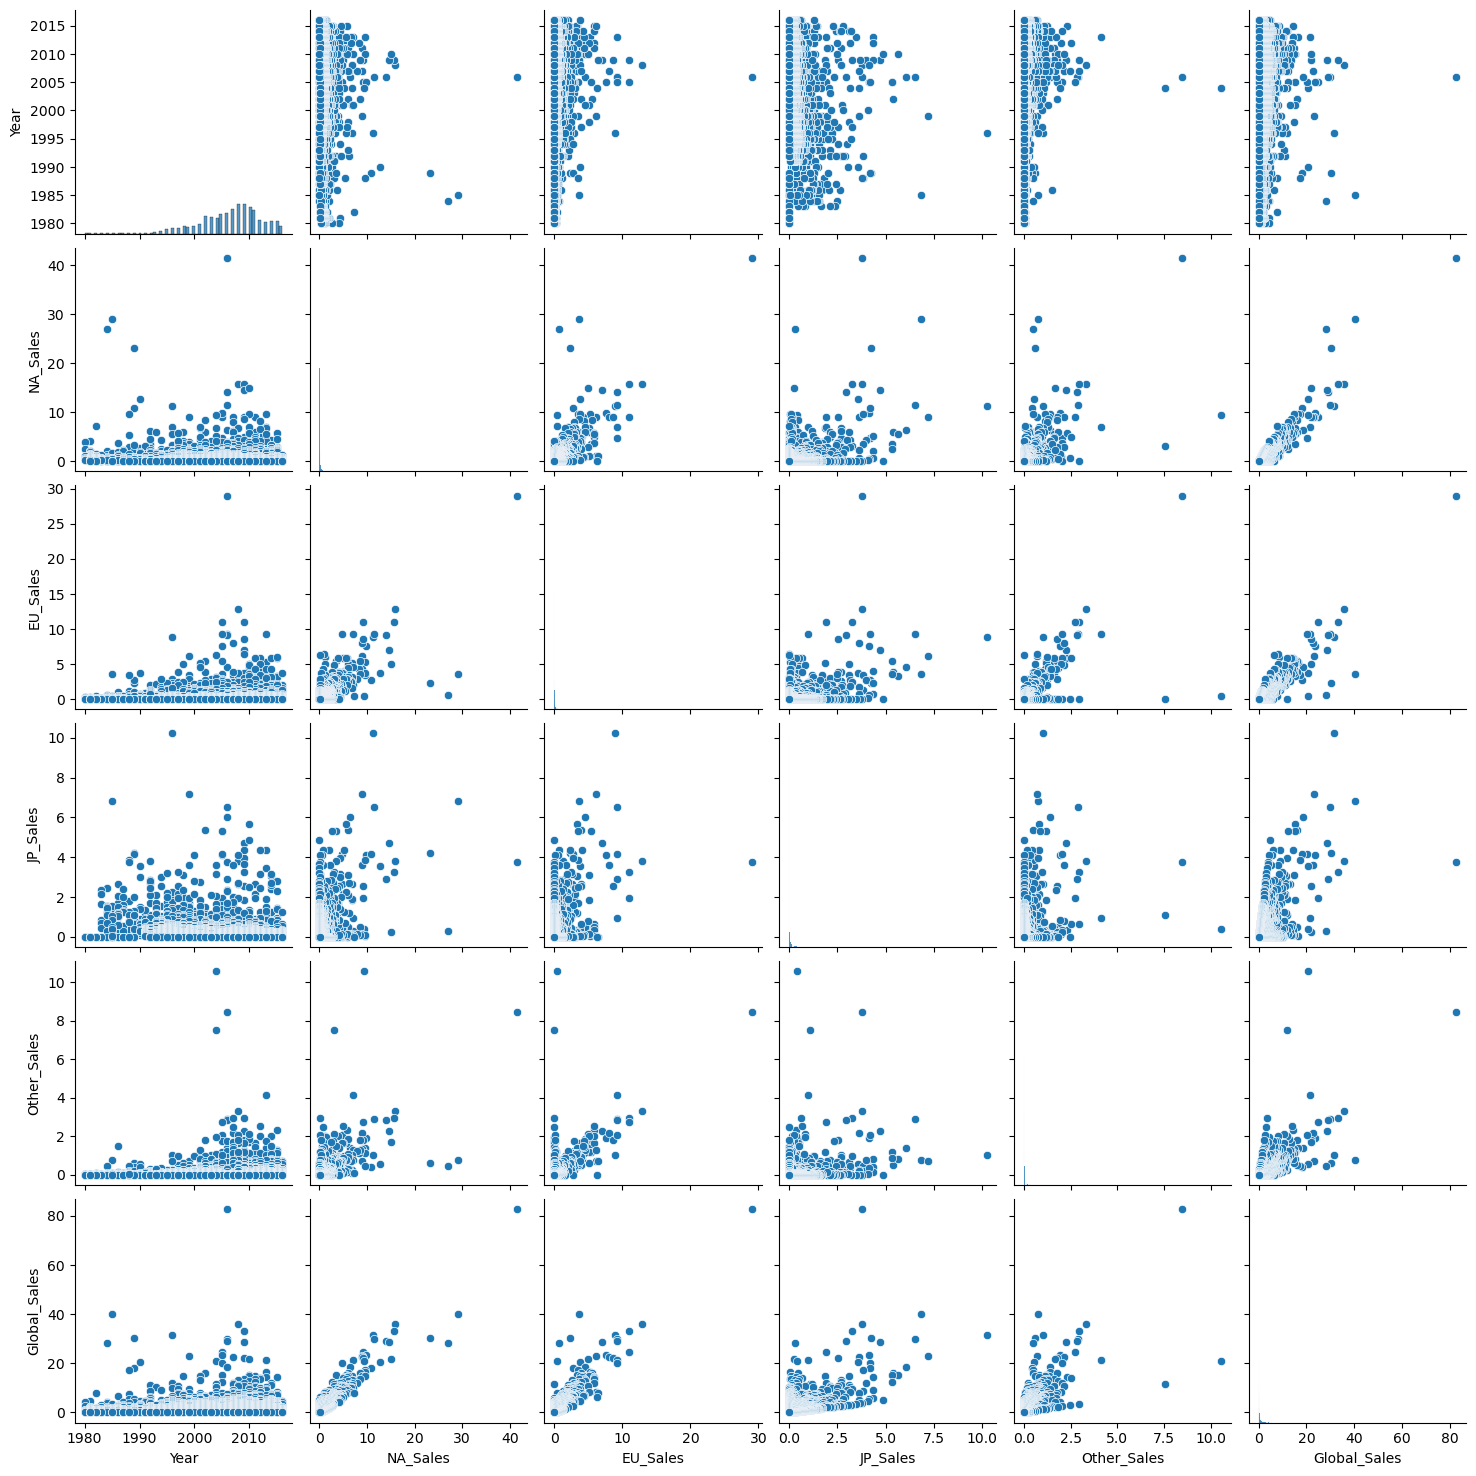

In [250]:
# Figure  2- Sales Contribution By Location
sns.pairplot(data_vg)

                             count
Name                              
Need for Speed: Most Wanted     12
Ratatouille                      9
LEGO Marvel Super Heroes         9
FIFA 14                          9
The LEGO Movie Videogame         8


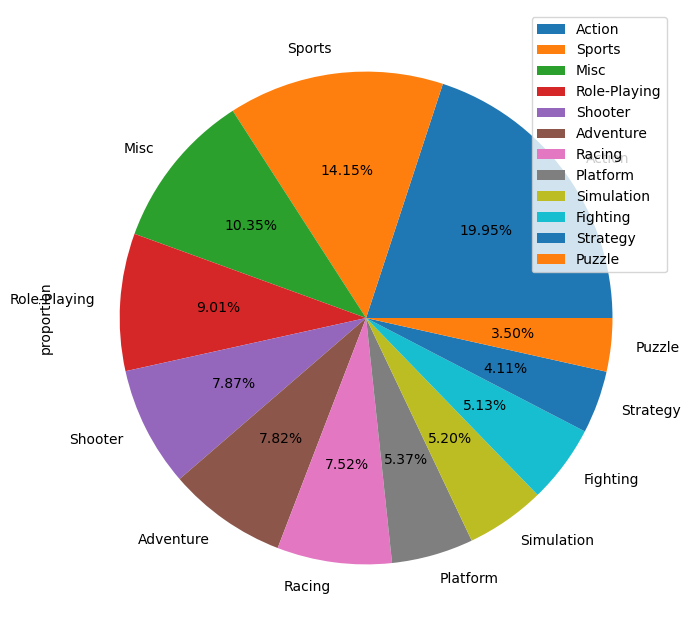

In [251]:
#Figure 3 - Genre Distribution
df = pd.DataFrame(data_vg['Genre'].value_counts(normalize=True))
plot = df.plot.pie(subplots=True, autopct='%.2f%%', figsize=(8, 8))
#Top 5 video games with most sales
df = pd.DataFrame(data_vg["Name"].value_counts().head(5))
print(df)

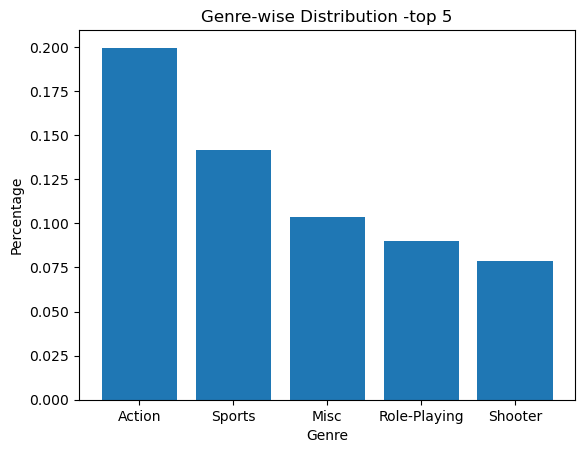

In [252]:
genre_counts = data_vg['Genre'].value_counts(normalize=True)[:5] # Select only the top 5 genres
genre_df = pd.DataFrame({'Genre': genre_counts.index, 'Percentage': genre_counts.values})
# Display the genre-wise distribution using a bar chart
plt.bar(genre_df['Genre'], genre_df['Percentage'])
plt.title('Genre-wise Distribution -top 5')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.show()


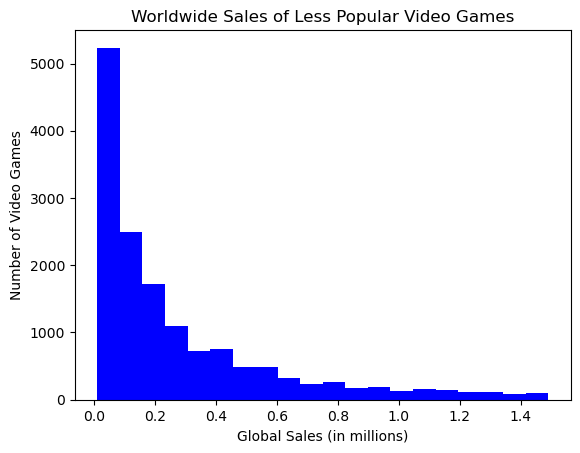

In [253]:
#Figure 4 - WorldWide Sales analysis of less than 1.5M$.

# Filter the data to include only games with global sales less than 1.5 million
filtered_data = data_vg[data_vg["Global_Sales"] < 1.5]

# Create a histogram of the global sales of less popular video games
plt.hist(filtered_data["Global_Sales"], bins=20, color='blue')

# Set the x-axis label and title of the histogram
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Number of Video Games")
plt.title("Worldwide Sales of Less Popular Video Games")

# Display the histogram
plt.show()

Text(0.5, 1.0, 'Publisher Market Share')

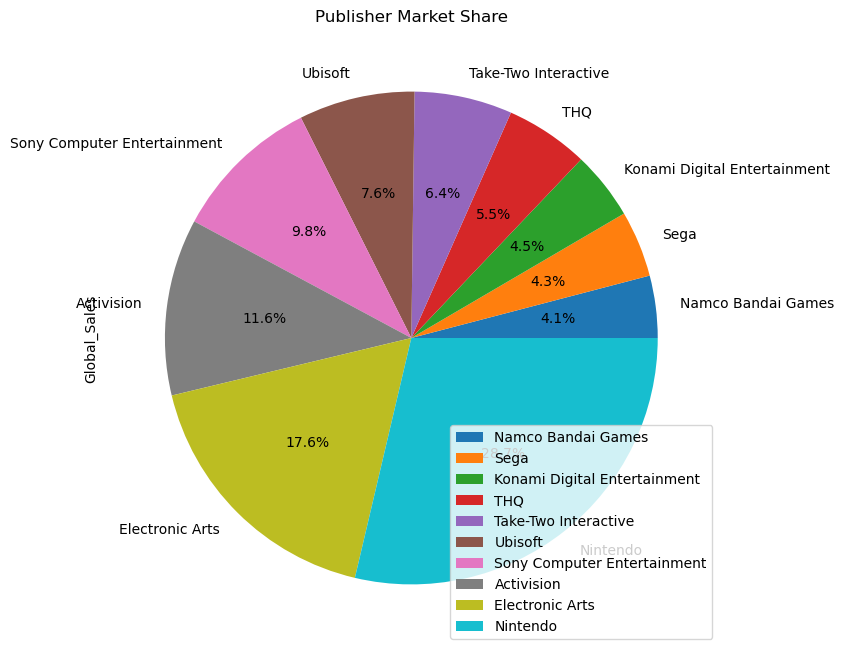

In [254]:
#Figure 5 - publisher market share analysis.
df1 = pd.DataFrame(data_vg.groupby('Publisher')['Global_Sales'].sum())
df1.sort_values(by=['Global_Sales'], inplace=True)
df1 = df1.tail(10)
plot = df1.plot.pie(y='Global_Sales', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Publisher Market Share")

<Axes: xlabel='Genre', ylabel='count'>

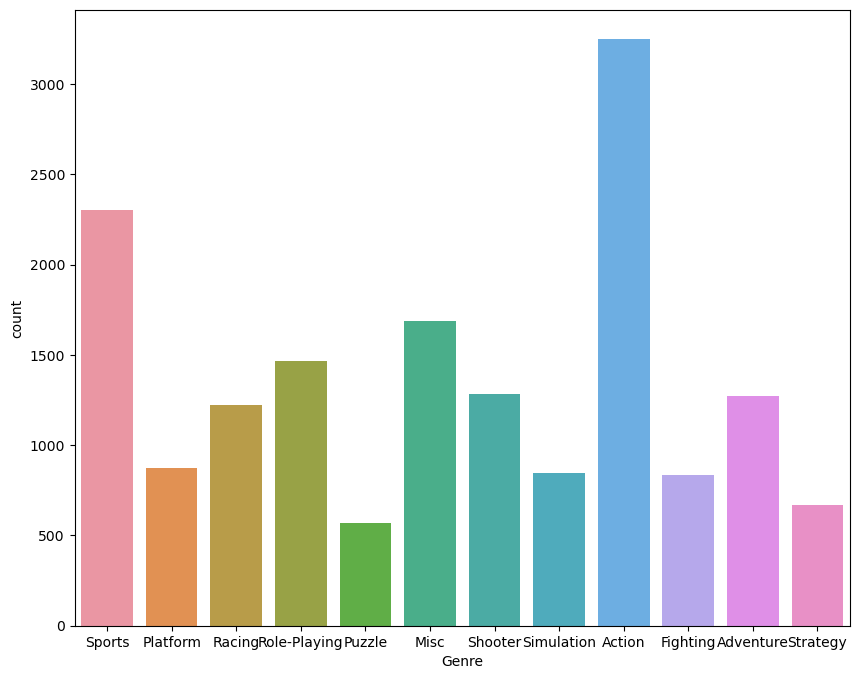

In [255]:
#Figure 6 - Number Of Games Produced In Each Genre
plt.figure(figsize=(10,8))
sns.countplot(x='Genre',data=data_vg)

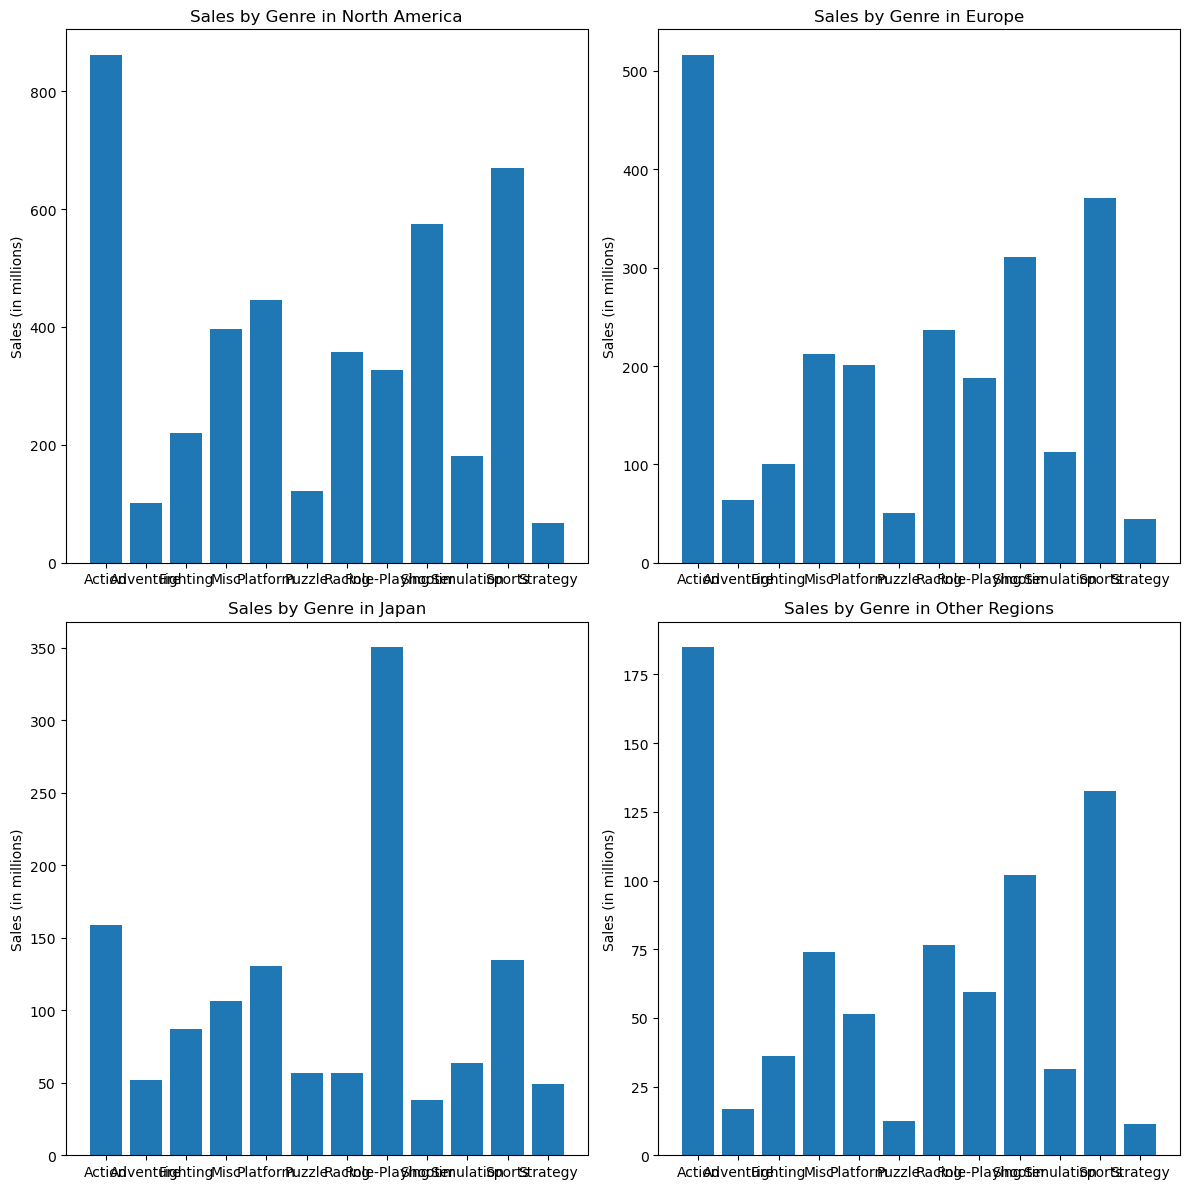

In [256]:
#Figure 7-10: Sales by Genre and region:
# Group the data by genre
df_genre = data_vg.groupby('Genre')

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Create a bar chart for each region
axs[0, 0].bar(df_genre['Genre'].first(), df_genre['NA_Sales'].sum())
axs[0, 0].set_title('Sales by Genre in North America')
axs[0, 1].bar(df_genre['Genre'].first(), df_genre['EU_Sales'].sum())
axs[0, 1].set_title('Sales by Genre in Europe')
axs[1, 0].bar(df_genre['Genre'].first(), df_genre['JP_Sales'].sum())
axs[1, 0].set_title('Sales by Genre in Japan')
axs[1, 1].bar(df_genre['Genre'].first(), df_genre['Other_Sales'].sum())
axs[1, 1].set_title('Sales by Genre in Other Regions')

# Set the y-axis label for each subplot
axs[0, 0].set_ylabel('Sales (in millions)')
axs[0, 1].set_ylabel('Sales (in millions)')
axs[1, 0].set_ylabel('Sales (in millions)')
axs[1, 1].set_ylabel('Sales (in millions)')

# Adjust the layout of the subplots
plt.tight_layout()

# Display the figure
plt.show()


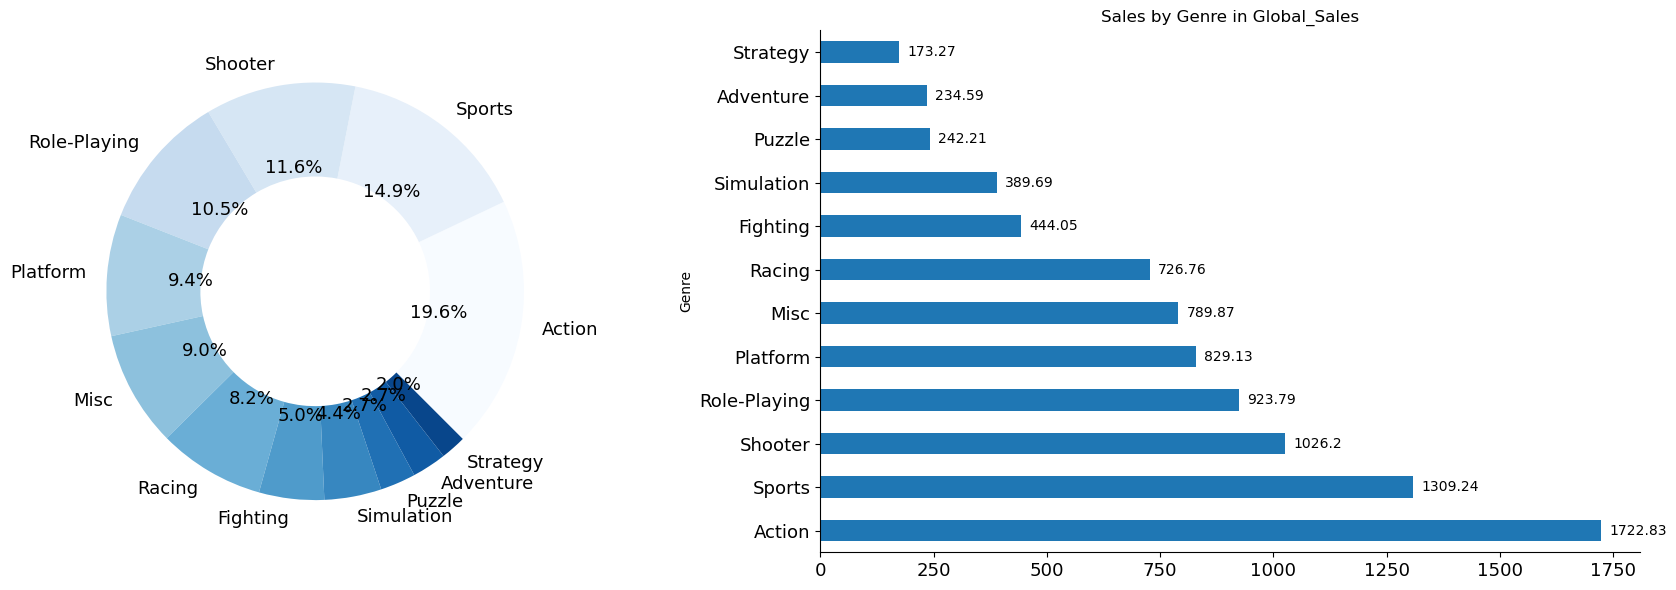

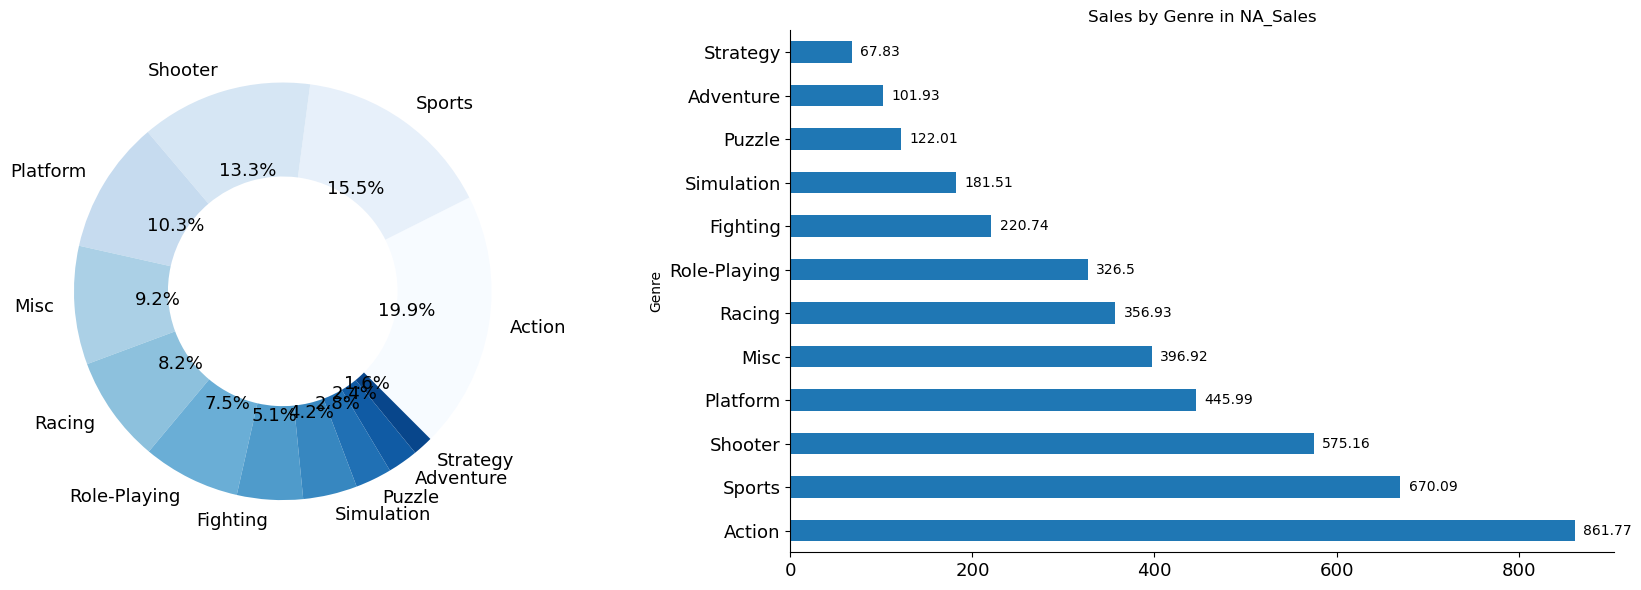

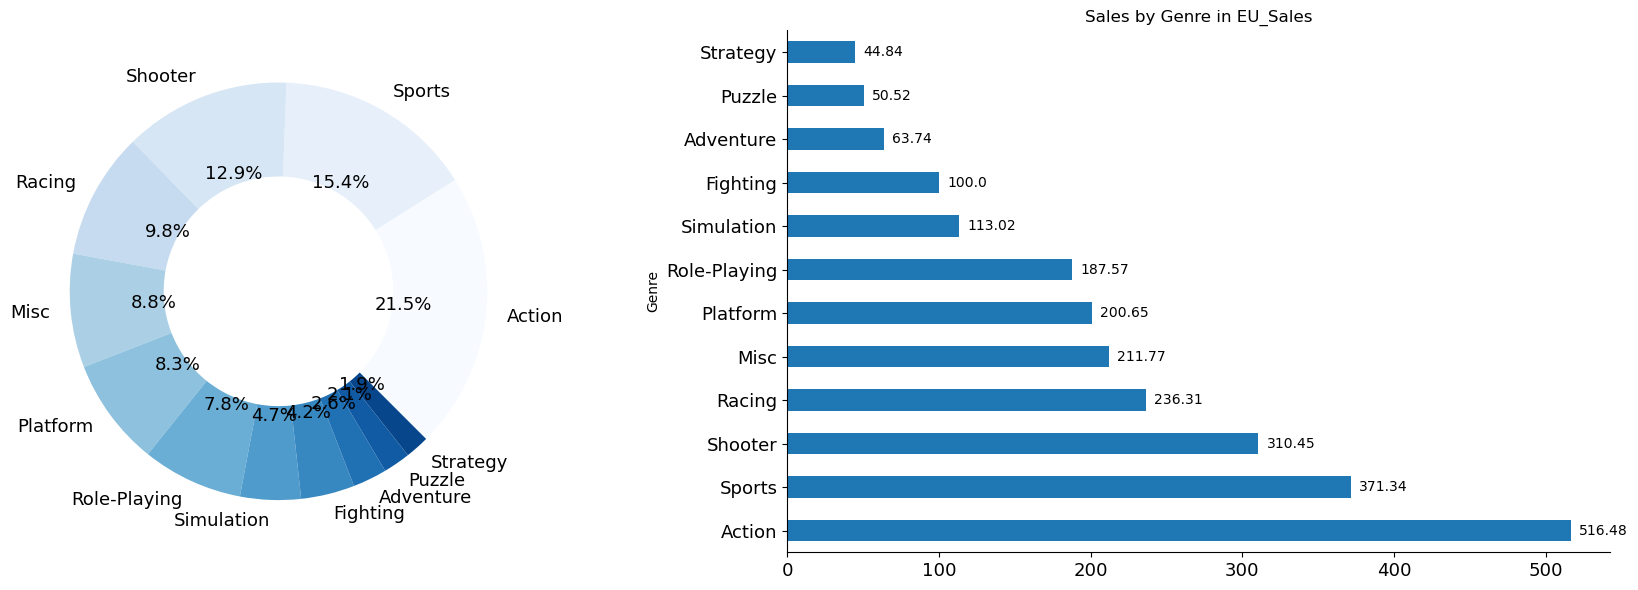

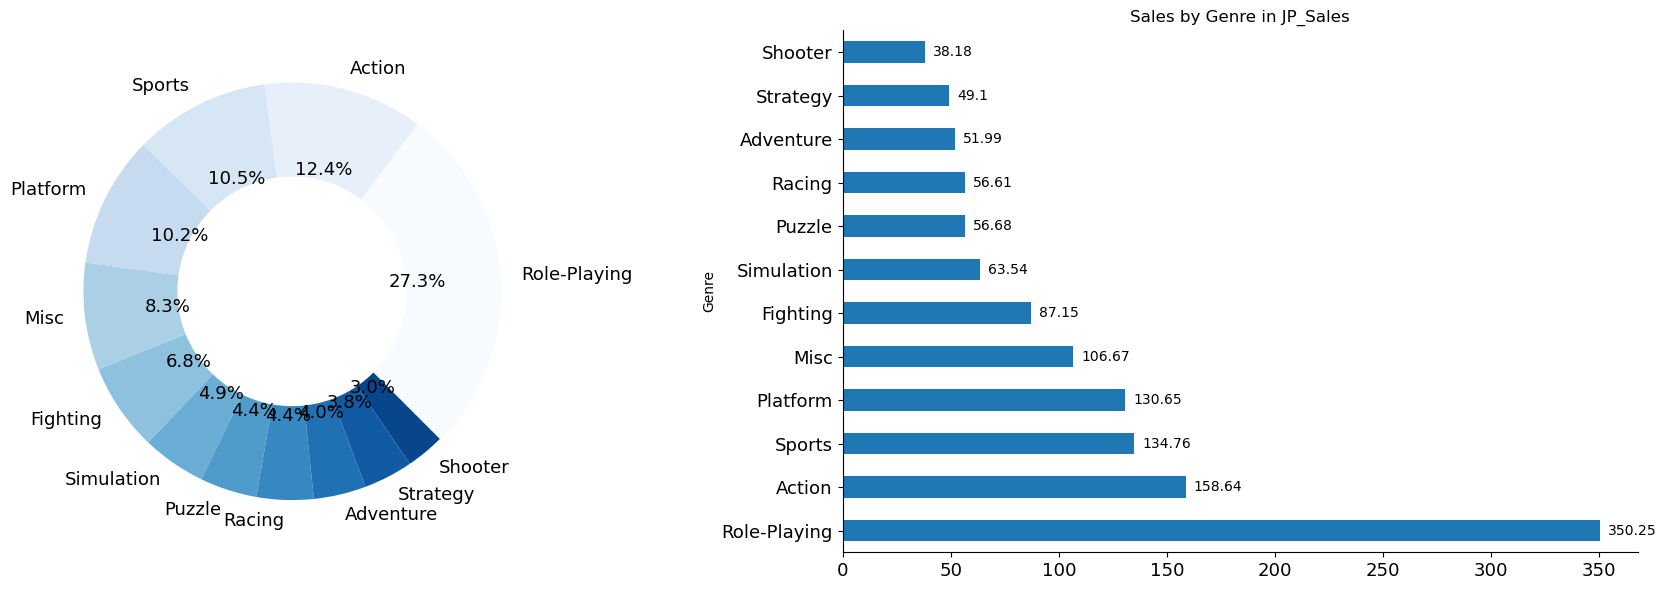

In [257]:
def genre_sales(region):
    fig, axs = plt.subplots(ncols=2, figsize=(18, 6))
    df_to_plot = df_genre.sum().sort_values(by=region, ascending=False)

    axs[1].set(title='Sales by Genre in ' + region, ylabel=None, xlabel='Total Sales (in millions)')
    axs[1].tick_params(axis='both', which='major', labelsize=13)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].grid(False)
    df_to_plot[region].plot.barh(ax=axs[1])

    for x, y in enumerate(df_to_plot[region]):
        labelr = round(y, 2)
        axs[1].annotate(labelr, (y, x), textcoords="offset points", xytext=(6, 0), ha='left', va="center")

    theme = plt.get_cmap('Blues')
    axs[0].set_prop_cycle("color", [theme(1. * i / len(df_to_plot)) for i in range(len(df_to_plot))])
    wedges, texts, _ = axs[0].pie(df_to_plot[region], wedgeprops=dict(width=0.45), startangle=-45,
                                  labels=df_to_plot.index, autopct="%.1f%%", textprops={'fontsize': 13})

    plt.tight_layout()

genre_sales('Global_Sales') #figure 7
genre_sales('NA_Sales') #figure 8
genre_sales('EU_Sales') #figure 9
genre_sales('JP_Sales') #figure 10

Text(0.5, 1.0, 'Sales Of Different Genre in Global Sales')

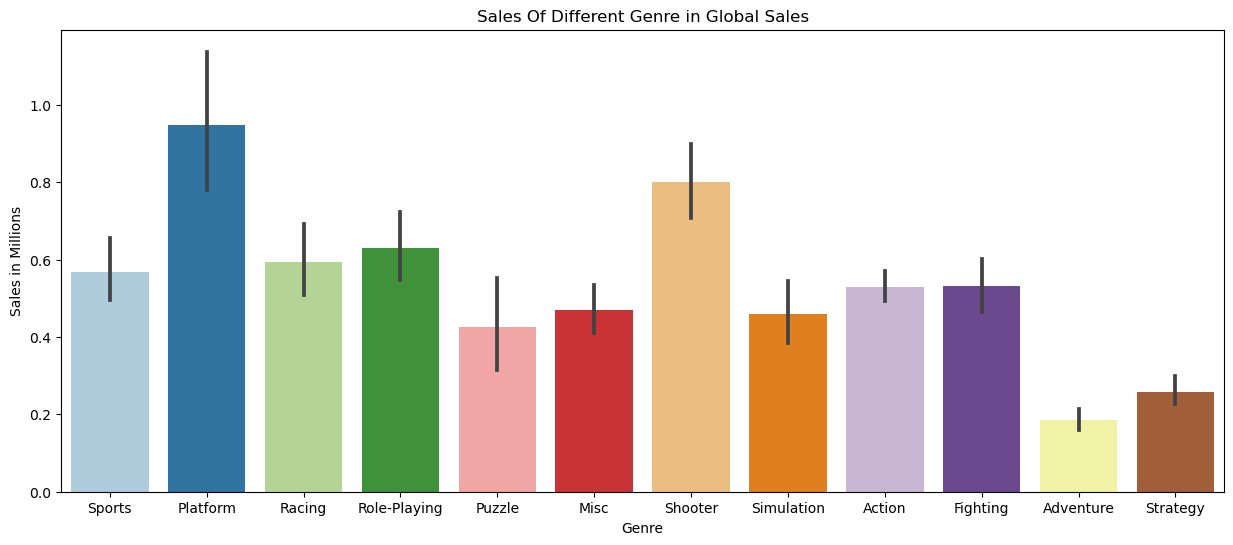

In [258]:
#Figure 11 - Sales Of Different Genre in Global Sales 
ax=plt.figure(figsize=(15,6)) 
sns.barplot(x='Genre',y='Global_Sales',data=data_vg,palette='Paired')
plt.ylabel('Sales in Millions')
plt.title('Sales Of Different Genre in Global Sales')

In [259]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Load the video game sales data into a DataFrame
# data_vg = pd.read_csv('vgsales.csv')

# # Select the columns to use for clustering
# columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
# X = data_vg[columns].values

# # Perform K-means clustering with 3 clusters
# kmeans = KMeans(n_clusters=3, random_state=42)  # You can set a random state for reproducibility
# kmeans.fit(X)

# # Add the cluster labels to the DataFrame
# data_vg['Clusters'] = kmeans.labels_

# # Create a scatter plot of the sales data with color-coded clusters
# colors = {0: 'red', 1: 'blue', 2: 'green'}  # Map cluster labels to colors
# plt.scatter(data_vg['NA_Sales'], data_vg['Global_Sales'], c=data_vg['Clusters'].map(colors))

# # Add a legend to the scatter plot
# legend_labels = {0: 'Low Sales', 1: 'high Sales', 2: 'med Sales'}  # Map cluster labels to legend labels
# legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
#                   for label, color in colors.items()]
# plt.legend(handles=legend_handles, title='Clusters', labels=legend_labels.values())

# # Add axis labels and a title to the scatter plot
# plt.xlabel('North America Sales (millions)')
# plt.ylabel('Global Sales (millions)')
# plt.title('Video Game Sales by Region and Cluster')

# plt.show()



In [260]:
import plotly.express as px
#K-MEANS ALGORITHM

X = data_vg.loc[:,'NA_Sales':].values
# Dividing the dataset into 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

data_vg['Cluster'] = kmeans.labels_
data_vg['Cluster'] = data_vg['Cluster'].astype(str)

def cat(cluster):
    if cluster == '0':
        return 'low sales'
    if cluster == '1':
        return 'high sales'
    if cluster == '2':
        return 'med sales'

data_vg['Cluster'] = data_vg['Cluster'].apply(cat)
# Visualizing the clusters 
fig = px.scatter(data_frame=data_vg,x='NA_Sales',y='Global_Sales',color='Cluster',template="plotly_white",
    color_discrete_map={'0':"rgb(219, 58, 52)", '2':"rgb(255, 200, 87)", '1':"rgb(8, 76, 97)"},
    hover_name='Name',
    hover_data=['Platform', 'Genre', 'Year'])
fig.show()

high = data_vg[data_vg['Cluster']=='high sales']


print("The most popular Platform in the high-sales cluster is: {}".format(', '.join(high['Platform'].value_counts().index[:1])))
print("Top 3 frequent Genres in the high-sales cluster are: {}".format(', '.join(high['Genre'].value_counts().index[:3])))
print("Top 3 frequent Publishers in the high-sales cluster are: {}".format(', '.join(high['Publisher'].value_counts().index[:3])))

data_vg.drop(columns="Cluster",inplace=True)

c:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



The most popular Platform in the high-sales cluster is: PS2
Top 3 frequent Genres in the high-sales cluster are: Action, Shooter, Sports
Top 3 frequent Publishers in the high-sales cluster are: Nintendo, Electronic Arts, Sony Computer Entertainment


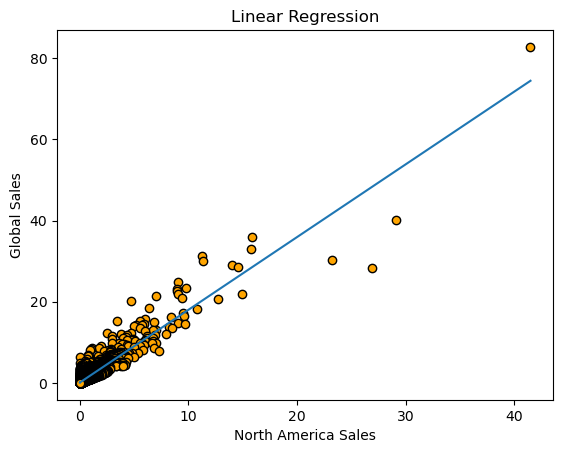

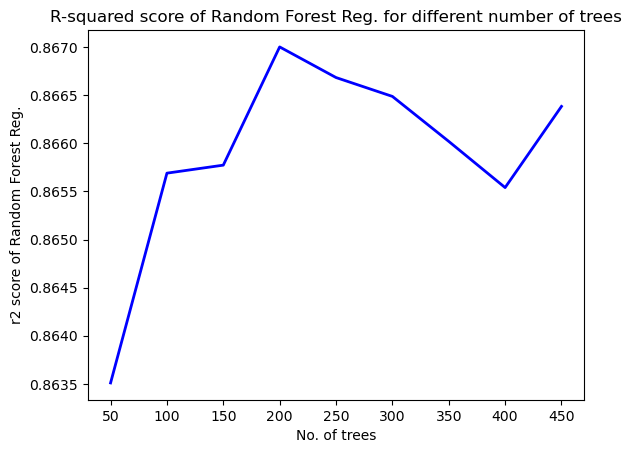

In [261]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the video game sales data
Data_vg = pd.read_csv('vgsales.csv')

# Split the data into training and test sets
train_data, test_data = train_test_split(Data_vg, test_size=0.2, random_state=0)

# Select the features to use for regression
features_train = train_data[['NA_Sales']]
target_train = train_data['Global_Sales']
features_test = test_data[['NA_Sales']]
target_test = test_data['Global_Sales']

# Train a random forest regressor with different number of trees
forestRange = range(50, 500, 50)
scores_list = []
for i in forestRange:
    regressor_Forest = RandomForestRegressor(n_estimators=i, random_state=0)
    regressor_Forest.fit(features_train, target_train)
    y_pred = regressor_Forest.predict(features_test)
    scores_list.append(r2_score(target_test, y_pred))

# Plot the scatter plot of NA_Sales vs Global_Sales with a linear regression line
x = Data_vg["NA_Sales"]
y = Data_vg["Global_Sales"]
plt.plot(x, y, 'o',color='orange',markeredgecolor='black')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.title('Linear Regression')

# Plot the R-squared score of the random forest regressor for different number of trees
plt.figure()
plt.plot(forestRange, scores_list, linewidth=2, color='blue')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.title('R-squared score of Random Forest Reg. for different number of trees')

plt.show()

In [262]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

le = LabelEncoder()

data_vg['Name'] = le.fit_transform(data_vg['Name'])
data_vg['Platform'] = le.fit_transform(data_vg['Platform'])
data_vg['Genre'] = le.fit_transform(data_vg['Genre'])
data_vg['Publisher'] = le.fit_transform(data_vg['Publisher'])
#split dataset in features and target variable
X = data_vg.drop(columns=['Global_Sales', 'JP_Sales', 'Other_Sales'])
y = data_vg['Global_Sales']
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
def model_score(lr, model_name='Model Name'):
    print(f'Score of {model_name} Model: {lr.score(X_test, y_test) * 100}%')
model_score(lr, 'Linear Regression')

def mse(lr_pred, model_name='Model Name'):
    print('Mean Squared Error: {} of {} model'.format(mean_squared_error(y_test, lr_pred), model_name))
mse(lr_pred, 'Linear Regression')

def mae(lr_pred, model_name='Model Name'):
    print('Mean Absolute Error: {} of {} model'.format(mean_absolute_error(y_test, lr_pred), model_name))
mae(lr_pred, 'Linear Regression')

def cross_val(lr, model_name='Model Name'):
    print('Cross Validation: {} of {} model'.format(str(np.mean(cross_val_score(lr, X, y, cv=5))), model_name))
cross_val(lr, 'Linear Regression')


def r2_score_func(lr_pred, model_name='Model Name'):
    print('r2 score: {} of {} model'.format(r2_score(y_test,lr_pred), model_name))
r2_score_func(lr_pred, 'Linear Regression')

Score of Linear Regression Model: 96.9966805186655%
Mean Squared Error: 0.10083463141427622 of Linear Regression model
Mean Absolute Error: 0.12054882756920848 of Linear Regression model
Cross Validation: -7.699867814239883 of Linear Regression model
r2 score: 0.969966805186655 of Linear Regression model


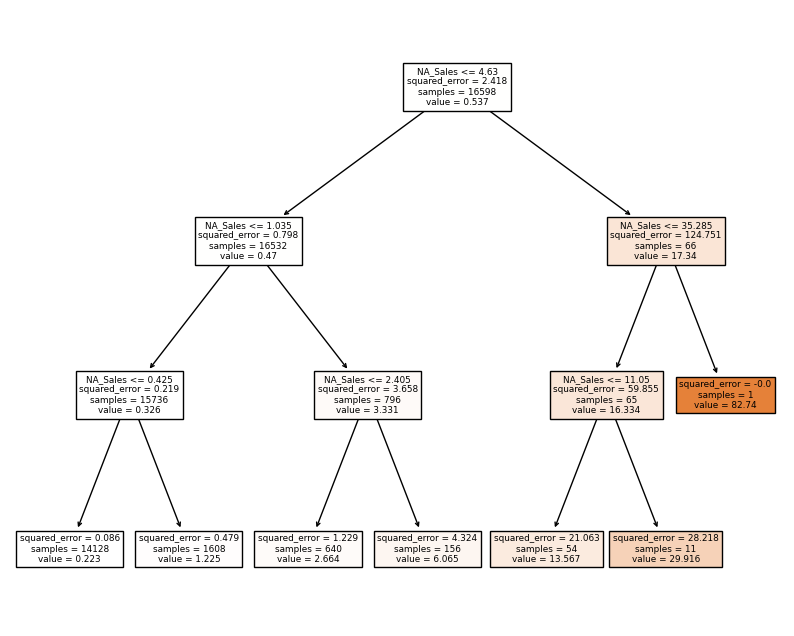

In [263]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Load the video game sales data
sales_data = pd.read_csv('vgsales.csv')

# Select the features and target variable
features = sales_data[['NA_Sales']]
target = sales_data['Global_Sales']

# Train a decision tree regressor with max depth of 3
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=36)
tree_reg.fit(features, target)

# Visualize the decision tree using Matplotlib
plt.figure(figsize=(10, 8))
plot_tree(tree_reg, feature_names=features.columns.tolist(), filled=True)
plt.show()


In [264]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the video game sales data
sales_data = pd.read_csv('vgsales.csv')

# Select the features to use for regression
features = sales_data[['NA_Sales']]
target = sales_data['Global_Sales']

# Split the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Train a decision tree regressor with random state of 0
regressor_tree = DecisionTreeRegressor(random_state=0)
regressor_tree.fit(features_train, target_train)

# Predict the target variable for the test set
target_pred = regressor_tree.predict(features_test)

# Calculate the R-squared score
r2_tree = r2_score(target_test, target_pred)
print("R-squared score for decision tree regressor: ", r2_tree)



R-squared score for decision tree regressor:  0.8209284650143099
